In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.4,
    fill_mode='nearest'
)
train = data_generator.flow_from_directory('PetImages/', class_mode='binary', batch_size=50, target_size=(200, 200))

Found 16139 images belonging to 2 classes.


In [3]:
train

In [4]:
test = data_generator.flow_from_directory('PetImagesTest/', class_mode='binary', batch_size=50, target_size=(200, 200))

Found 1666 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 320001    
Total params: 320,897
Trainable params: 320,897
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train, steps_per_epoch=len(train), validation_data=test, validation_steps=len(test), epochs=30)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
323/323 [==============================] - 280s 867ms/step - loss: 0.7727 - accuracy: 0.5710 - val_loss: 0.6616 - val_accuracy: 0.6200
Epoch 2/30
323/323 [==============================] - 277s 859ms/step - loss: 0.6593 - accuracy: 0.5911 - val_loss: 0.6473 - val_accuracy: 0.6128
Epoch 3/30
323/323 [==============================] - 277s 859ms/step - loss: 0.6541 - accuracy: 0.6002 - val_loss: 0.7031 - val_accuracy: 0.5204
Epoch 4/30
323/323 [==============================] - 278s 861ms/step - loss: 0.6568 - accuracy: 0.6059 - val_loss: 0.6483 - val_accuracy: 0.6170
Epoch 5/30
323/323 [==============================] - 277s 858ms/step - loss: 0.6534 - accuracy: 0.6038 - val_loss: 0.6368 - val_accuracy: 0.6297
Epoch 6/30
323/323 [==============================] - 278s 859ms/step - loss: 0.6515 - accuracy: 0.6058 - val_loss: 0.6535 - val_accuracy: 0.5930
Epoch 7/30
323/323 [============================

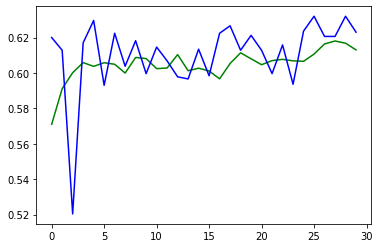

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green')
plt.plot(history.history['val_accuracy'], color='blue')

In [10]:
model.save('catvsdog.h5')

In [1]:
# MasoudKaviani.ir